In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [6]:
df_train=pd.read_csv(r"F:/LGM-TASK/train.csv")
df_test=pd.read_csv(r"F:/LGM-TASK/test.csv")
df_members=pd.read_csv(r"F:/LGM-TASK/members.csv")
df_songs=pd.read_csv(r"F:/LGM-TASK/songs.csv")

In [7]:
df_train.head() #displays first 5 rows

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [8]:
df_test.head() #displays first 5 rows

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [9]:
df_members.head() #displays first 5 rows

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [10]:
df_songs.head() #displays first 5 rows

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [14]:
df_train = df_train.sample(frac=0.01)

In [17]:
df_train = pd.merge(df_train, df_songs, on='song_id', how='left')

In [18]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,Y/mUwPLnWsB5Ss0D2xs50cK1aU3OD/j5HahB9w/2jTM=,BLce3ukk3en8AbDDv+3rbe28xt1xORn7gI7dOpUjkj8=,my library,Local playlist more,local-library,1,241766.0,465,小宇-宋念宇,宋念宇,曹宇棠,3.0
1,QDvq4xn7ZSBkamVnc8nL672oxKVqcR2zdgRGQf0giXs=,M4TGJvGh50Rp07mYNcogSoGFWZf+f1Lfp4wgukK9Idc=,my library,Local playlist more,local-library,0,232803.0,465,aMEI (張惠妹),Ba San Yao A Pu,Chen Zhen Chuan,3.0
2,Kkjxa5h5eBZchzEI9XZByQ5xyIK1au14+vufw2JIPO4=,ITS8bw3g5nT+E1OGn71TjxijGv7zgGicqK5SiIgAo2M=,my library,Local playlist more,local-library,0,289227.0,1616,Alton Squad,Alton Squad,NaN,52.0
3,iKkXLhWEA/jSY3TNBWeIjyx65vw2lfZZF6PQsxpGkoA=,jVigTkYsvp1jM1VbYBgYHBKoMPfqTTmsnFQYD/aaEsM=,discover,Online playlist more,online-playlist,0,195326.0,958,Alberto Ponce,NaN,NaN,52.0
4,8arpyGZg/DAjyCJ5IWlQRUHExXe7ykId/WmusVkd3L8=,G/4+VCRLpfjQJ4SAwMDcf+W8PTw0eOBRgFvg4fHUOO8=,my library,Local playlist more,local-library,1,298945.0,465,林芯儀 (Shennio Lin),朱國豪,李偉傑,3.0


In [20]:
df_train = pd.merge(df_train, df_members, on='msno', how='left')
df_train.shape

(73774, 18)

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    73774 non-null  object 
 1   song_id                 73774 non-null  object 
 2   source_system_tab       73531 non-null  object 
 3   source_screen_name      69548 non-null  object 
 4   source_type             73565 non-null  object 
 5   target                  73774 non-null  int64  
 6   song_length             58129 non-null  float64
 7   genre_ids               57178 non-null  object 
 8   artist_name             58129 non-null  object 
 9   composer                44918 non-null  object 
 10  lyricist                33104 non-null  object 
 11  language                58128 non-null  float64
 12  city                    73774 non-null  int64  
 13  bd                      73774 non-null  int64  
 14  gender                  44254 non-null

In [23]:
np.mean(df_train.target)

0.5026296527231816

In [24]:
null_check = df_train.isnull()

In [25]:
print((null_check.sum()/null_check.count())*100)

msno                       0.000000
song_id                    0.000000
source_system_tab          0.329384
source_screen_name         5.728305
source_type                0.283298
target                     0.000000
song_length               21.206658
genre_ids                 22.495730
artist_name               21.206658
composer                  39.114051
lyricist                  55.127823
language                  21.208014
city                       0.000000
bd                         0.000000
gender                    40.014097
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64


In [26]:
for i in df_train.select_dtypes(include=['object']).columns:
    df_train[i][df_train[i].isnull()] = 'unknown'
    
df_train = df_train.fillna(value=0)

In [28]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,Y/mUwPLnWsB5Ss0D2xs50cK1aU3OD/j5HahB9w/2jTM=,BLce3ukk3en8AbDDv+3rbe28xt1xORn7gI7dOpUjkj8=,my library,Local playlist more,local-library,1,241766.0,465,小宇-宋念宇,宋念宇,曹宇棠,3.0,9,29,female,9,20071102,20171008
1,QDvq4xn7ZSBkamVnc8nL672oxKVqcR2zdgRGQf0giXs=,M4TGJvGh50Rp07mYNcogSoGFWZf+f1Lfp4wgukK9Idc=,my library,Local playlist more,local-library,0,232803.0,465,aMEI (張惠妹),Ba San Yao A Pu,Chen Zhen Chuan,3.0,1,0,unknown,3,20130910,20170920
2,Kkjxa5h5eBZchzEI9XZByQ5xyIK1au14+vufw2JIPO4=,ITS8bw3g5nT+E1OGn71TjxijGv7zgGicqK5SiIgAo2M=,my library,Local playlist more,local-library,0,289227.0,1616,Alton Squad,Alton Squad,unknown,52.0,6,18,male,3,20141117,20170908
3,iKkXLhWEA/jSY3TNBWeIjyx65vw2lfZZF6PQsxpGkoA=,jVigTkYsvp1jM1VbYBgYHBKoMPfqTTmsnFQYD/aaEsM=,discover,Online playlist more,online-playlist,0,195326.0,958,Alberto Ponce,unknown,unknown,52.0,1,0,unknown,7,20110329,20171001
4,8arpyGZg/DAjyCJ5IWlQRUHExXe7ykId/WmusVkd3L8=,G/4+VCRLpfjQJ4SAwMDcf+W8PTw0eOBRgFvg4fHUOO8=,my library,Local playlist more,local-library,1,298945.0,465,林芯儀 (Shennio Lin),朱國豪,李偉傑,3.0,4,24,male,3,20161119,20170712


In [30]:
df_train['registration_init_time'] = df_train['registration_init_time'].astype('category')
df_train['expiration_date'] = df_train['expiration_date'].astype('category')

In [31]:
for col in df_train.select_dtypes(include=['object']).columns:
    df_train[col] = df_train[col].astype('category')

In [32]:
for i in df_train.select_dtypes(include=['category']).columns:
    df_train[i] = df_train[i].cat.codes

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train = df_train.drop(['target'], axis = 1).values
y_train = df_train['target'].values

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.30)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators=250)

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
rfc_pred = rfc.predict(X_test)

In [41]:
print(confusion_matrix(y_test,rfc_pred))

[[6783 4367]
 [3884 7099]]


In [42]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62     11150
           1       0.62      0.65      0.63     10983

    accuracy                           0.63     22133
   macro avg       0.63      0.63      0.63     22133
weighted avg       0.63      0.63      0.63     22133



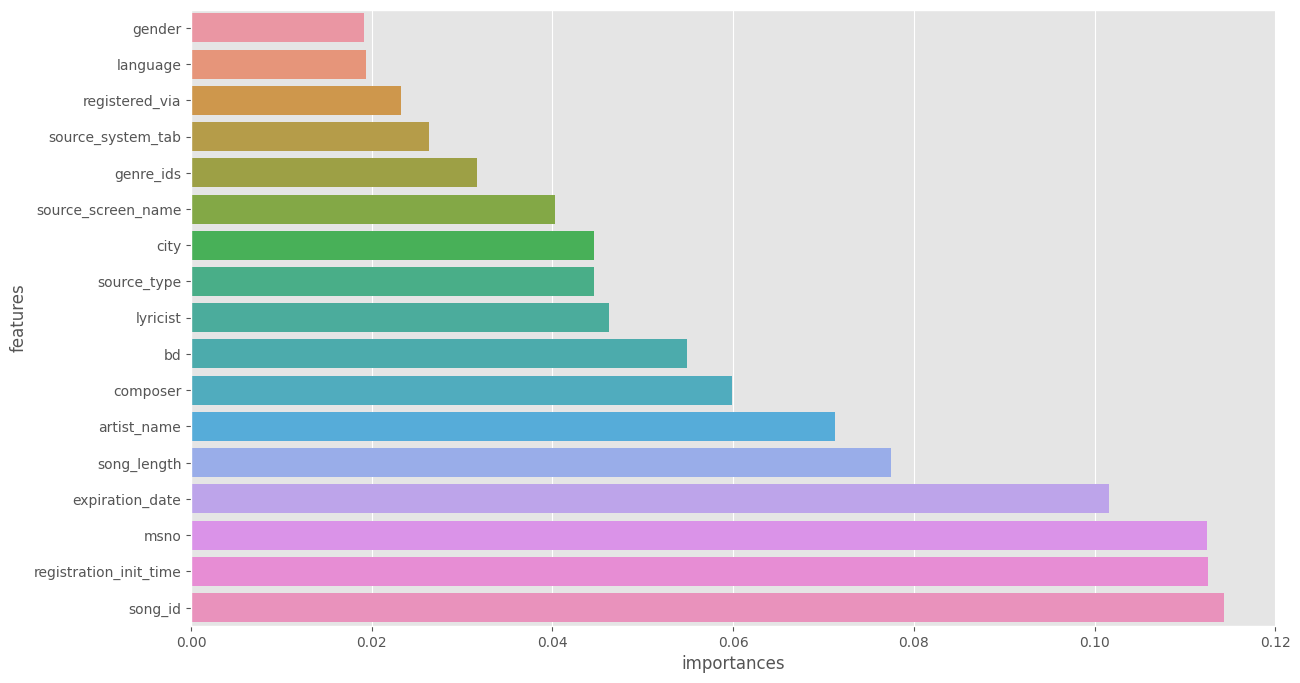

In [44]:
#barplot 
train_plot = pd.DataFrame({'features': df_train.columns[df_train.columns != 'target'],
                        'importances': rfc.feature_importances_})
train_plot = train_plot.sort_values('importances', ascending=True)

plt.figure(figsize=[14,8])
sns.barplot(x = train_plot.importances, y = train_plot.features)
plt.show()